In [34]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### Задача 1
**Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.   
Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.**

In [35]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

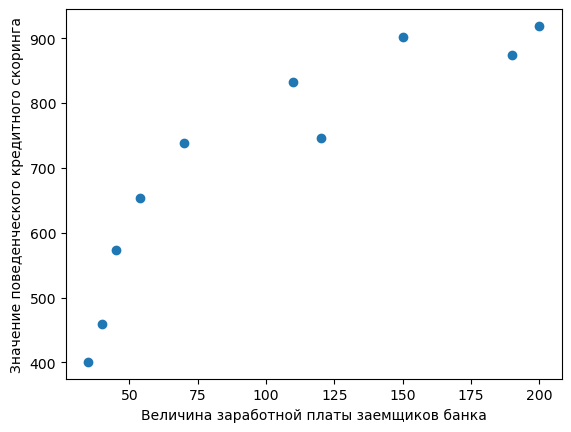

In [36]:
plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы заемщиков банка')
plt.ylabel('Значение поведенческого кредитного скоринга', rotation=90)
plt.show()

По графику видим линейную зависимость. Исходим из ожидания, что между данными есть положительная корреляция. 
  
$Сov(xy) = M(XY) - M(X)*M(Y)$


In [37]:
cov = np.mean(zp*ks) - np.mean(zp)*np.mean(ks)

In [38]:
cov = np.cov(zp, ks, ddof=0)[0, 1]
print(f'{cov:.3f}')

9157.84


Находим коэффициент корреляции Пирсона

$corr(zp, ks) = \frac{Cov(zp, ks)}{\sqrt{Var(zp)}\sqrt{Var(ks)}}$  

In [39]:
corr = cov / (np.std(zp) * np.std(ks))
print(f'{corr:.3f}')

0.887


$r = \frac{\operatorname{cov}(zp, ks)}{\sigma_{zp} \sigma_{ks}}$  

In [40]:
ratio = cov / (np.std(zp, ddof=0) * np.std(ks, ddof=0))
print(f'{ratio:.3f}')

0.89


##### Numpy

In [43]:
corr_numpy = np.corrcoef(zp, ks)[0][1]
print(f'{corr_numpy:.3f}')

0.89


##### Pandas

In [44]:
corr_pandas = pd.Series(zp).corr(pd.Series(ks), method='pearson')
print(f'{corr_pandas:.3f}')

0.887


#### Задача 2 
**Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:  
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.  
Известно, что в генеральной совокупности IQ распределен нормально.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.**

In [45]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
alpha = 0.05

Так как среднее квадратичное отклонение неизвестностно, для расчета довереительного интервала используем t критерий и формулу среднего арифметического    
$\overline{X}\underline{+}t\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}}$ 

In [46]:
n = iq.size
std = iq.std(ddof=1)
mean = iq.mean()
print(f'Размер выборки: {n}\n'f'Несмещенное среднее квадратическое отклонение: {std:.2f}\n'f'Среднее выборочное: {mean:.2f}')


Размер выборки: 10
Несмещенное среднее квадратическое отклонение: 10.55
Среднее выборочное: 118.10


In [ ]:
Находим t значение и отклонение

In [48]:
t = stats.t.ppf(1 - alpha / 2, n - 1)
d = t * std / (n) ** 0.5
print(f't значение: {t:.2f}\n'f'Отклонение: {d:.2f}')

t значение: 2.26
Отклонение: 7.54


In [49]:
min = mean - d
max = mean + d
print(f'Доверительный интервал для математического ожидания с надежностью 0.95 составляет: {min: .2f};{max: .2f}')

Доверительный интервал для математического ожидания с надежностью 0.95 составляет:  110.56; 125.64


#### Задача 3
**Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,  
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.**

Так как среднее квадратичное отклонение известно, используем z критерий и формулу для среднего арифметического  
$\overline{X}\underline{+}z\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}}$ 

In [50]:
var = 25
n = 27
mean = 174.2
std = (var)**0.5
alpha = 0.05
z=stats.norm.ppf(1-alpha/2,n-1)
d=z*std/(n)**0.5
min = mean - d
max = mean + d
print(f'Доверительный интервал для математического ожидания с надежностью 0.95: {min: .2f};{max: .2f}')


Доверительный интервал для математического ожидания с надежностью 0.95:  147.30; 201.10
